In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Neural Nets library
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<ipython-input-1-6b01ea6ac21e>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
# Importing data
data = pd.read_csv('Cancer_Data.csv')
data.shape

(569, 33)

In [3]:
# Checking
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Verificando
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [6]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
data['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True)
print(f'Class 0 represents BENIGN cancer')
print(f'Class 1 represents the MALIGNANT cancer')

Class 0 represents BENIGN cancer
Class 1 represents the MALIGNANT cancer


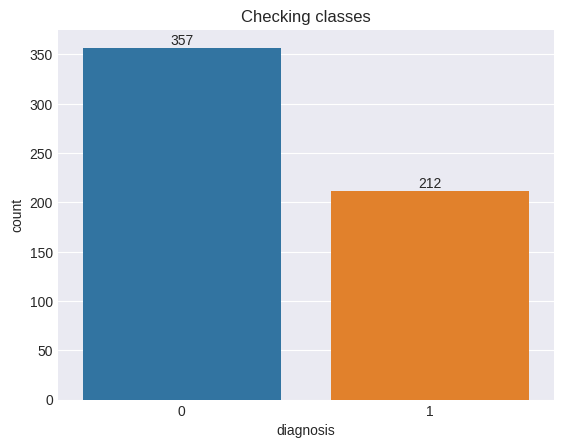

In [12]:
axle = sns.countplot(data = data, x = 'diagnosis')
plt.title('Checking classes')
axle.bar_label(axle.containers[0], label_type = 'edge');

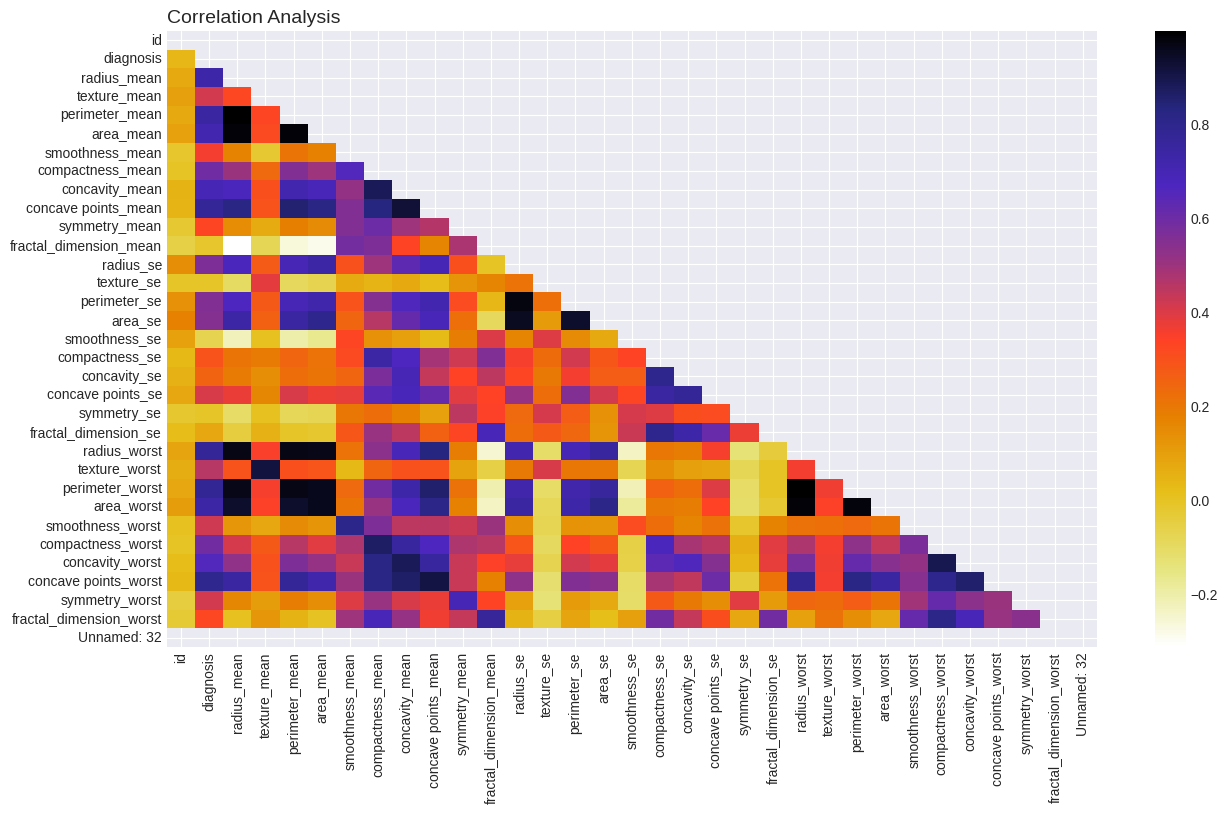

In [13]:
# Plot
figure, axle = plt.subplots(figsize = (15, 8))

# Calculating Coor
correlation = data.corr()

# Generate a mask for the top triangle
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

# Title
plt.title('Correlation Analysis', loc = 'left', fontsize = 14)

# Plot
sns.heatmap(
    correlation, 
    mask = mask, 
    cmap = 'CMRmap_r',
    annot = False,
    );

In [14]:
# Removing the column ID
data.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

In [15]:
# Defining 
characteristics = data.drop(columns = 'diagnosis')
forecaster = data['diagnosis']

In [16]:
characteristics.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
forecaster.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [18]:
# Separating data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    
    # Data for division
    characteristics, 
    forecaster, 
    
    #Test size
    test_size = 0.2, 
    
    # Fix the samples
    random_state = 10)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [20]:
# Train the neural network
mlp = MLPClassifier(
    
    # a tuple that defines the number of neurons in each hidden layer of the neural network.
    hidden_layer_sizes = (100),

    # the activation function used in the neurons of the neural network. In this case, the function ReLU.
    activation = 'tanh',

    # gradient
    # the optimizer used to adjust neural network weights during training. In this case, the optimizer Adam.
    # {'lbfgs', 'sgd', 'adam'}
    # lbfgs --> is an optimizer from the quasi-Newton family of methods.
    # 'sgd' --> refers to stochastic gradient descent.
    # 'adam' --> refers to a stochastic gradient based optimizer
    solver = 'sgd',

    # the maximum number of iterations during neural network training.
    max_iter = 500,

    # Print the training log
    verbose = True,

    # the initial learning rate used by the optimizer when training the neural network.
    learning_rate_init = 0.001, 

    # L2 regularization parameter to avoid neural network overfitting.
    alpha = 0.0001,

)

mlp.fit(X_train, y_train)

Iteration 1, loss = 0.66494104
Iteration 2, loss = 0.51619394
Iteration 3, loss = 0.51710766
Iteration 4, loss = 0.53267940
Iteration 5, loss = 0.49174666
Iteration 6, loss = 0.49347079
Iteration 7, loss = 0.50165406
Iteration 8, loss = 0.47354182
Iteration 9, loss = 0.45928575
Iteration 10, loss = 0.45258870
Iteration 11, loss = 0.44199620
Iteration 12, loss = 0.41846133
Iteration 13, loss = 0.44567738
Iteration 14, loss = 0.45073952
Iteration 15, loss = 0.41931153
Iteration 16, loss = 0.40035315
Iteration 17, loss = 0.45350996
Iteration 18, loss = 0.45124764
Iteration 19, loss = 0.45775177
Iteration 20, loss = 0.42915673
Iteration 21, loss = 0.42936150
Iteration 22, loss = 0.44207983
Iteration 23, loss = 0.44682478
Iteration 24, loss = 0.41255547
Iteration 25, loss = 0.41780938
Iteration 26, loss = 0.39934187
Iteration 27, loss = 0.40609857
Iteration 28, loss = 0.38480100
Iteration 29, loss = 0.40089291
Iteration 30, loss = 0.43739124
Iteration 31, loss = 0.46730272
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=100, max_iter=500,
              solver='sgd', verbose=True)

In [22]:
# Predicting the test data
y_pred = mlp.predict(X_test)

# Calculating the accuracy of the model
acc = accuracy_score(y_test, y_pred)

print("Accuracy (Forecast):", acc)

Accuracy (Forecast): 0.8596491228070176


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define the pipeline
pipeline = Pipeline([
    ('mlp', MLPClassifier())
])

# define the parameters to be tested
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (150,), (200) ],
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__learning_rate_init': [0.001],
    'mlp__activation': ['relu', 'tanh', 'logistic', 'identity']
}

# perform the grid search
grid_search = GridSearchCV(pipeline, param_grid = param_grid, cv = 5, verbose = 2)
grid_search.fit(characteristics , forecaster)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.4s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.1s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.7s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.7s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.1s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=sgd; total time=   0.8s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=

GridSearchCV(cv=5, estimator=Pipeline(steps=[('mlp', MLPClassifier())]),
             param_grid={'mlp__activation': ['relu', 'tanh', 'logistic',
                                             'identity'],
                         'mlp__hidden_layer_sizes': [(50,), (100,), (150,),
                                                     200],
                         'mlp__learning_rate_init': [0.001],
                         'mlp__solver': ['lbfgs', 'sgd', 'adam']},
             verbose=2)

In [25]:
grid_search.best_params_

{'mlp__activation': 'identity',
 'mlp__hidden_layer_sizes': (100,),
 'mlp__learning_rate_init': 0.001,
 'mlp__solver': 'lbfgs'}

In [26]:
grid_search.best_score_

0.9490607048594939

In [27]:
grid_search.cv_results_

{'mean_fit_time': array([0.41104388, 0.21691461, 0.37632222, 0.7695179 , 0.44164615,
        0.58528295, 1.64356084, 0.63522038, 1.58505807, 2.1949439 ,
        0.26235771, 1.15959382, 0.92140555, 0.41389499, 0.79243836,
        0.58480744, 0.22720799, 1.87217283, 1.75631952, 0.21243486,
        1.17090049, 1.41948919, 0.2584507 , 0.8795135 , 0.71042747,
        0.54452858, 0.45692973, 0.73955894, 0.81892514, 0.71030021,
        0.98581777, 1.09189739, 0.85494003, 1.39321194, 0.98301873,
        0.81971555, 0.14750834, 0.08347983, 0.32344899, 0.81971669,
        0.07524943, 0.26554737, 0.35866132, 0.10336037, 0.23460541,
        0.57047691, 0.11869335, 0.48949566]),
 'std_fit_time': array([0.27662239, 0.31289177, 0.15862831, 0.43962448, 0.40013971,
        0.13262898, 0.3576461 , 0.65117892, 0.60134516, 1.07927505,
        0.11013908, 0.35181682, 0.13933194, 0.10163445, 0.28299818,
        0.04394499, 0.10400871, 0.41995464, 0.71004734, 0.03678516,
        0.69753027, 0.4634393 , 0.053

In [28]:
from sklearn.metrics import classification_report

# Make the predictions
y_pred = grid_search.predict(X_test)

# Calculate ranking report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.88      0.97      0.93        39

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

